In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_df = pd.read_excel("FB.xlsx")
data_df.head(10)

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
0,246675545449582_1649696485147474,529,512,262,432,92,3,1,1,0,0,0,0
1,246675545449582_1649426988507757,150,0,0,150,0,0,0,0,0,0,1,0
2,246675545449582_1648730588577397,227,236,57,204,21,1,1,0,0,0,0,0
3,246675545449582_1648576705259452,111,0,0,111,0,0,0,0,0,0,1,0
4,246675545449582_1645700502213739,213,0,0,204,9,0,0,0,0,0,1,0
5,246675545449582_1645650162218773,217,6,0,211,5,1,0,0,0,0,1,0
6,246675545449582_1645564175560705,503,614,72,418,70,10,2,0,3,0,0,0
7,246675545449582_1644824665634656,295,453,53,260,32,1,1,0,1,0,0,0
8,246675545449582_1644655795651543,203,1,0,198,5,0,0,0,0,0,1,0
9,246675545449582_1638788379571618,170,9,1,167,3,0,0,0,0,0,1,0


In [3]:
data_df.shape

(7050, 13)

In [4]:
data_df.dtypes

status_id        object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
status_link       int64
status_photo      int64
status_status     int64
dtype: object

In [5]:
data_df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,0.008936,0.608227,0.051773
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,0.094115,0.488181,0.221584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,1.000000,1.000000,1.000000


In [6]:
data_df['num_reactions'].unique()

array([529, 150, 227, ..., 558, 570, 415], dtype=int64)

In [7]:
data_df['num_hahas'].unique()

array([  1,   0,   2,   5,   3,   8,   4,   6,   7,  13,  10,  40,  24,
         9,  22,  11,  14,  23, 102,  16,  17,  97,  57,  48, 100,  50,
        12,  15,  18,  76,  91, 157,  20,  29,  33,  25,  28,  19,  43,
        32,  26,  21], dtype=int64)

In [8]:
data_df.isna().sum()

status_id        0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
status_link      0
status_photo     0
status_status    0
dtype: int64

In [10]:
# Check for duplicate data

dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data_df[dups]

Number of duplicate rows = 53


,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
1698,246675545449582_326883450762124,211,2,0,211,0,0,0,0,0,0,1,0
1729,246675545449582_429583263825475,537,16,1,537,0,0,0,0,0,0,1,0
6221,819700534875473_1002372733274918,376,20,3,354,19,3,0,0,0,0,0,0
6222,819700534875473_1001982519980606,255,7,4,249,6,0,0,0,0,0,1,0
6223,819700534875473_1000607730118085,1704,21,3,1685,15,2,2,0,0,0,1,0
6224,819700534875473_999880033524188,205,39,4,197,4,4,0,0,0,0,0,1
6225,819700534875473_998824716963053,336,42,2,285,5,0,0,46,0,0,1,0
6226,819700534875473_997075427137982,111,2,1,110,1,0,0,0,0,0,0,1
6227,819700534875473_995933077252217,357,18,9,352,3,1,1,0,0,0,1,0
6228,819700534875473_995839410594917,114,7,0,109,3,2,0,0,0,0,1,0


In [11]:
# Remove duplicate rows

print('Number of rows before discarding duplicates = %d' % (data_df.shape[0]))
data_df.drop_duplicates(subset = None, keep = 'first', inplace=True)
print('Number of rows after discarding duplicates = %d' % (data_df.shape[0]))

Number of rows before discarding duplicates = 7050
Number of rows after discarding duplicates = 6997


In [12]:
# Check for correlation of variable
data_df.corr(method='pearson')

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
num_reactions,1.000000,0.156218,0.259680,0.994672,0.310690,0.261717,0.179681,0.082112,0.136084,0.030557,-0.144434,0.111832
num_comments,0.156218,1.000000,0.640528,0.105964,0.521310,0.163498,0.325056,0.257537,0.239549,-0.023479,-0.292059,-0.049279
num_shares,0.259680,0.640528,1.000000,0.179705,0.820279,0.409797,0.399855,0.218618,0.332347,-0.025894,-0.354980,-0.066380
num_likes,0.994672,0.105964,0.179705,1.000000,0.212760,0.200039,0.123154,0.057129,0.096298,0.034635,-0.112900,0.121497
num_loves,0.310690,0.521310,0.820279,0.212760,1.000000,0.510144,0.507892,0.226564,0.394810,-0.029596,-0.352689,-0.065089
num_wows,0.261717,0.163498,0.409797,0.200039,0.510144,1.000000,0.288463,0.091419,0.191667,-0.011609,-0.090285,-0.001998
num_hahas,0.179681,0.325056,0.399855,0.123154,0.507892,0.288463,1.000000,0.154029,0.225077,-0.015996,-0.159739,-0.034360
num_sads,0.082112,0.257537,0.218618,0.057129,0.226564,0.091419,0.154029,1.000000,0.143704,-0.014973,-0.089065,0.018574
num_angrys,0.136084,0.239549,0.332347,0.096298,0.394810,0.191667,0.225077,0.143704,1.000000,-0.015252,-0.126767,-0.028746
status_link,0.030557,-0.023479,-0.025894,0.034635,-0.029596,-0.011609,-0.015996,-0.014973,-0.015252,1.000000,-0.118278,-0.022167


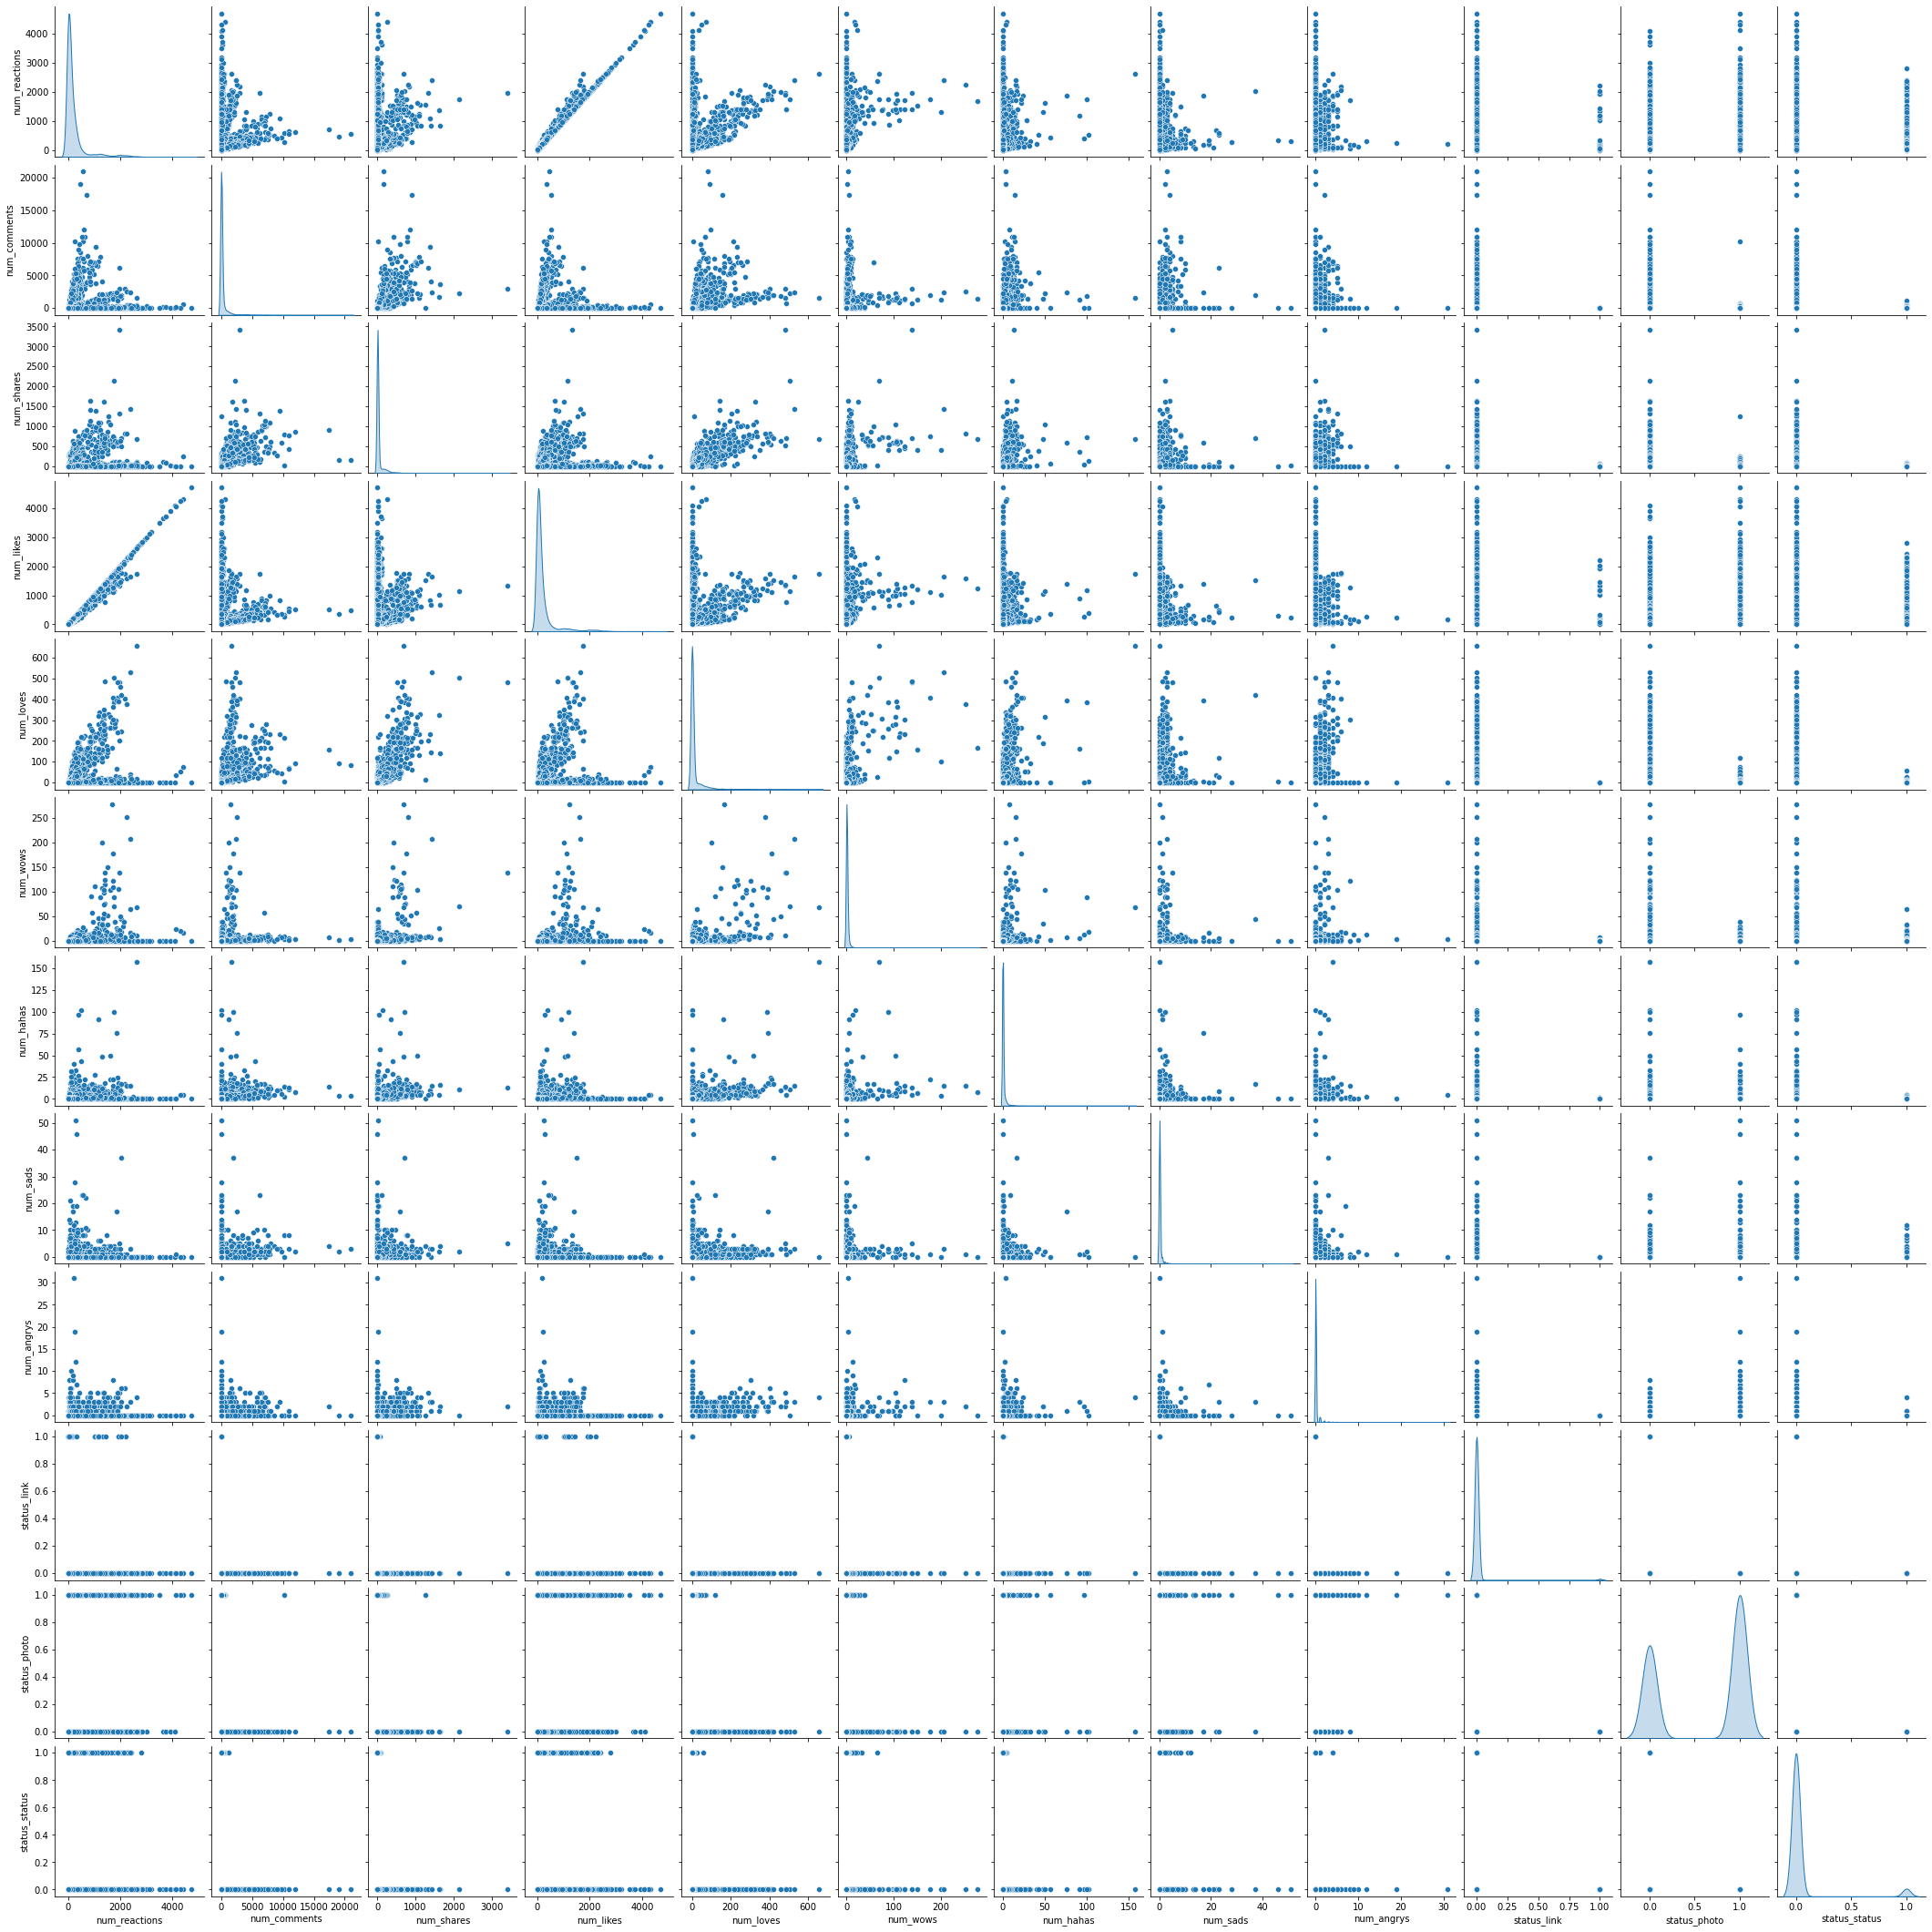

In [13]:
#Let us check for pair plots
sns.pairplot(data_df,diag_kind='kde')

<AxesSubplot:>

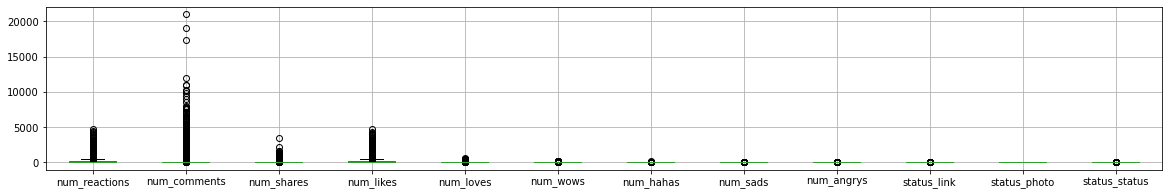

In [14]:
data_df.boxplot(figsize=(20,3))

In [20]:
# We could see few outliers here. Possible mode of imputation:
# Remove the outliers by taking anything above 3 sd from mean
# Take logarithmic transformation, it would reduce the variation
# Group few levels

pd.crosstab(data_df['num_comments'], data_df['status_photo']).head(10)

status_photo,0,1
num_comments,,
0,744,1375
1,99,465
2,53,308
3,51,257
4,42,207
5,46,165
6,50,137
7,38,113
8,24,112


In [25]:
# We could see from 4 point onward we have similar pattern, and also few points. We can club the levels together
data_df['num_comments'] = np.where(data_df['num_comments'] >6, 6, data_df['num_comments'])
data_df['num_comments'].value_counts()

5    3396
0    2119
1     564
2     361
3     308
4     249
Name: num_comments, dtype: int64

In [23]:
pd.crosstab(data_df['num_reactions'], data_df['status_photo']).head(10)

status_photo,0,1
num_reactions,,
0,94,27
1,83,48
2,69,55
3,68,48
4,41,37
5,36,58
6,20,47
7,20,56
8,20,65


In [41]:
data_df['num_reactions'] = np.where(data_df['num_reactions'] >3, 3, data_df['num_reactions'])
data_df['num_reactions'].value_counts()

3    6621
1     131
2     124
0     121
Name: num_reactions, dtype: int64

In [42]:
pd.crosstab(data_df['num_shares'], data_df['status_photo']).head(10)

status_photo,0,1
num_shares,,
0,998,2909
1,209,604
2,78,236
3,1470,493


In [43]:
data_df['num_shares'] = np.where(data_df['num_shares'] >3, 3, data_df['num_shares'])
data_df['num_shares'].value_counts()

0    3907
3    1963
1     813
2     314
Name: num_shares, dtype: int64

In [44]:
pd.crosstab(data_df['num_likes'], data_df['status_photo']).head(10)

status_photo,0,1
num_likes,,
0,96,30
1,82,46
2,2577,4166


In [45]:
data_df['num_likes'] = np.where(data_df['num_likes'] >2, 2, data_df['num_likes'])
data_df['num_likes'].value_counts()

2    6743
1     128
0     126
Name: num_likes, dtype: int64

In [46]:
pd.crosstab(data_df['num_loves'], data_df['status_photo']).head(10)

status_photo,0,1
num_loves,,
0,1290,2936
1,165,442
2,56,223
3,44,161
4,29,98
5,1171,382


In [48]:
data_df['num_loves'] = np.where(data_df['num_loves'] >4, 4, data_df['num_loves'])
data_df['num_loves'].value_counts()

0    4226
4    1680
1     607
2     279
3     205
Name: num_loves, dtype: int64

In [49]:
pd.crosstab(data_df['num_wows'], data_df['status_photo']).head(10)

status_photo,0,1
num_wows,,
0,1852,3443
1,375,326
2,194,150
3,103,108
4,72,62
5,38,35
6,23,31
7,8,19
8,12,11


In [82]:
data_df['num_wows'] = np.where(data_df['num_wows'] >2, 2, data_df['num_wows'])
data_df['num_wows'].value_counts()

0    5295
2    1001
1     701
Name: num_wows, dtype: int64

In [83]:
pd.crosstab(data_df['num_hahas'], data_df['status_photo']).head(10)

status_photo,0,1
num_hahas,,
0,1833,4047
1,263,125
2,202,21
3,138,11
4,319,38


In [84]:
data_df['num_hahas'] = np.where(data_df['num_hahas'] >6, 6, data_df['num_hahas'])
data_df['num_hahas'].value_counts()

0    5880
1     388
4     357
2     223
3     149
Name: num_hahas, dtype: int64

In [85]:
pd.crosstab(data_df['num_sads'], data_df['status_photo']).head(10)

status_photo,0,1
num_sads,,
0,2272,4127
1,264,53
2,98,15
3,53,10
4,68,37


In [86]:
data_df['num_sads'] = np.where(data_df['num_sads'] >5, 5, data_df['num_sads'])
data_df['num_sads'].value_counts()

0    6399
1     317
2     113
4     105
3      63
Name: num_sads, dtype: int64

In [87]:
pd.crosstab(data_df['num_angrys'], data_df['status_photo']).head(10)

status_photo,0,1
num_angrys,,
0,2370,4207
1,263,12
2,67,4
3,55,19


In [88]:
data_df['num_angrys'] = np.where(data_df['num_angrys'] >4, 4, data_df['num_angrys'])
data_df['num_angrys'].value_counts()

0    6577
1     275
3      74
2      71
Name: num_angrys, dtype: int64

In [89]:
data_new = data_df.drop(['status_id'], axis =1)

data_new.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
0,3,5,3,2,4,2,1,1,0,0,0,0
1,3,0,0,2,0,0,0,0,0,0,1,0
2,3,5,3,2,4,1,1,0,0,0,0,0
3,3,0,0,2,0,0,0,0,0,0,1,0
4,3,0,0,2,4,0,0,0,0,0,1,0


In [90]:
from scipy.stats import zscore
data_new=data_new.apply(zscore)
data_new.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
0,0.219982,0.939941,1.487319,0.183729,1.642382,2.230940,0.600633,1.314368,-0.223654,-0.095319,-1.240865,-0.232557
1,0.219982,-1.282090,-0.798042,0.183729,-0.716351,-0.534074,-0.379457,-0.259051,-0.223654,-0.095319,0.805889,-0.232557
2,0.219982,0.939941,1.487319,0.183729,1.642382,0.848433,0.600633,-0.259051,-0.223654,-0.095319,-1.240865,-0.232557
3,0.219982,-1.282090,-0.798042,0.183729,-0.716351,-0.534074,-0.379457,-0.259051,-0.223654,-0.095319,0.805889,-0.232557
4,0.219982,-1.282090,-0.798042,0.183729,1.642382,-0.534074,-0.379457,-0.259051,-0.223654,-0.095319,0.805889,-0.232557


<AxesSubplot:>

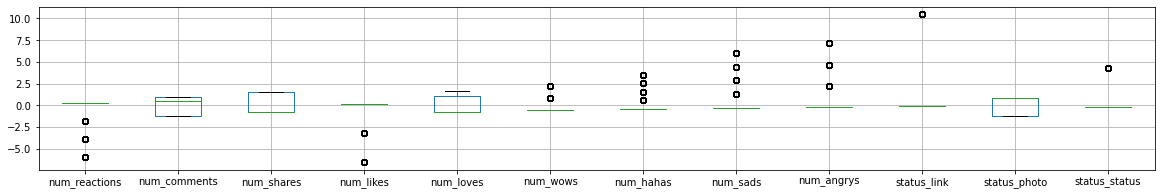

In [92]:
data_new.boxplot(figsize=(20,3))

In [93]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00014294  0.27763919  0.16304912  0.9533213   0.15587495  0.1166915
   0.08348588  0.05699475  0.04920688  0.01475205  0.13352425  0.05116566]
 [ 0.27763919  1.00014294  0.44477617  0.23301234  0.50029139  0.38482929
   0.32789321  0.16856624  0.19873934 -0.03547466 -0.18305718  0.09078293]
 [ 0.16304912  0.44477617  1.00014294  0.13780356  0.61130919  0.43165157
   0.48804284  0.25719302  0.27589156  0.0057657  -0.42097365 -0.05531961]
 [ 0.9533213   0.23301234  0.13780356  1.00014294  0.1287819   0.096802
   0.06972739  0.047602    0.04109757  0.01239609  0.12310298  0.04273354]
 [ 0.15587495  0.50029139  0.61130919  0.1287819   1.00014294  0.61671899
   0.54622767  0.31398666  0.30400559 -0.05133744 -0.32126472 -0.03824866]
 [ 0.1166915   0.38482929  0.43165157  0.096802    0.61671899  1.00014294
   0.45059347  0.26272696  0.30302757 -0.03417835 -0.14832636 -0.01046603]
 [ 0.08348588  0.32789321  0.48804284  0.06972739  0.54622767  0.45059347
   1.00014294

In [114]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.16454794  0.6503049   0.71475191 -0.06579213  0.06339585  0.11045633
  -0.09099739 -0.02279237 -0.08247087 -0.00698215 -0.05391981  0.00717162]
 [-0.33228436  0.12753532 -0.0310172  -0.09175848 -0.18578805 -0.32874502
   0.16620131  0.13119855  0.78329623 -0.15256261 -0.13347136  0.1478878 ]
 [-0.39488174 -0.04995379 -0.01721903 -0.03349791  0.04771929 -0.28469874
  -0.35177777 -0.23074354 -0.01094456 -0.19436502  0.55724563 -0.48105457]
 [-0.15035272  0.64961938 -0.69738619 -0.06785797  0.07390866  0.13175523
  -0.1196399  -0.03083233 -0.125037   -0.02025433 -0.10086757  0.01146761]
 [-0.42724823 -0.04953503 -0.00887642  0.08022413 -0.08196663 -0.26788151
   0.09109709 -0.08135755 -0.1633935   0.81935664 -0.13048085 -0.00507728]
 [-0.36215966 -0.03874086  0.00580868  0.1656331  -0.10338339 -0.21283895
   0.5051557   0.20483196 -0.48637176 -0.4515346  -0.19384492 -0.09342197]
 [-0.39766128 -0.14287127 -0.00267291  0.11225053  0.08412979  0.19419234
  -0.16439786 

In [115]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.6725670819117697
1.9976827339381815
0.04505161339236366
1.2333734496969653
1.0316780936221936
0.9996614930216728
0.7105785172009211
0.6671848652684058
0.5779576405026925
0.3078134098582089
0.3427350969166559
0.41543127053618734


In [73]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 30.43648356  47.09167329  57.40514069  65.99628034  74.16762828
  80.28356167  85.87205448  90.6282527   94.09761722  96.92864024
  99.62475582 100.        ]


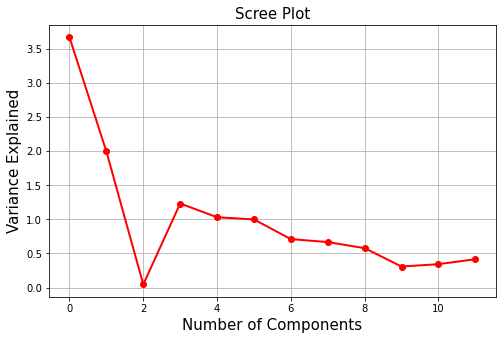

In [95]:
# Step 3 View Scree Plot to identify the number of components to be built
# how many principal components are preferred?
fig = plt.figure(figsize=(8,5))
sing_vals = range(data_new.shape[1])
plt.plot(sing_vals, eig_vals, 'ro-', linewidth=2)
# plt.figure(figsize=(12,7))
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

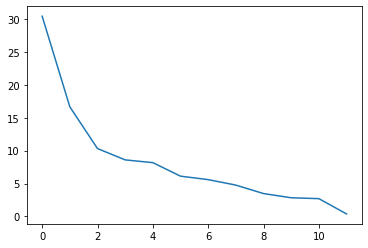

In [64]:
plt.plot(var_exp)

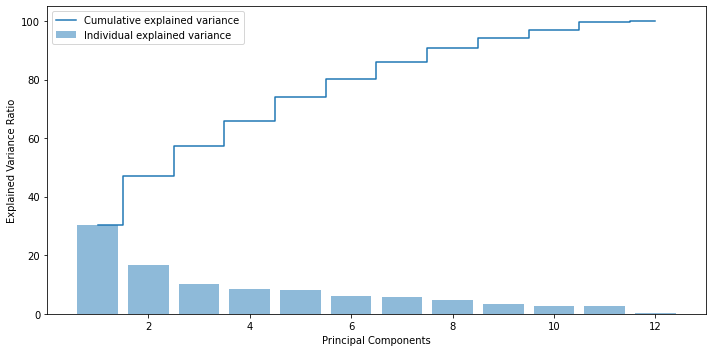

In [71]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [67]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 12 to 8)

pca = PCA(n_components=8)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[ 3.25611173, -1.6353052 ,  2.2021322 , ..., -2.22761563,
         0.50242092, -1.6353052 ],
       [ 0.41743239, -0.52916673,  0.16373242, ...,  3.03693948,
        -0.65586347, -0.52916673],
       [ 0.01874835, -0.5326457 ,  0.4652589 , ..., -0.90986969,
        -0.27446481, -0.5326457 ],
       ...,
       [ 0.58402949, -0.10078952, -0.7696608 , ...,  0.55575577,
        -0.34333679, -0.10078952],
       [-1.10084886,  0.0185294 , -0.24877476, ..., -0.01756405,
        -0.26974097,  0.0185294 ],
       [-0.69990732, -0.56467135, -0.20375282, ..., -0.07282651,
         0.77435497, -0.56467135]])

In [68]:
pca.components_

array([[ 0.16369307,  0.33144637,  0.39398969,  0.14966825,  0.42466278,
         0.35540682,  0.40057935,  0.27245344,  0.29276151, -0.01380854,
        -0.24117515,  0.01751605],
       [-0.65118   , -0.12984908,  0.04665123, -0.65039346,  0.04681933,
         0.04727703,  0.14086204,  0.10837652,  0.12726658,  0.00714507,
        -0.28568746, -0.0059934 ],
       [ 0.06128685,  0.10128303,  0.04880167,  0.06268821, -0.06647861,
        -0.18149045, -0.113392  , -0.08084283, -0.1691018 ,  0.26788946,
        -0.53202093,  0.73451774],
       [ 0.04770456, -0.14333858,  0.08608305,  0.05539084, -0.04387142,
        -0.0772358 ,  0.05870645, -0.01058418,  0.0699117 ,  0.89178996,
        -0.0891769 , -0.38356466],
       [ 0.11567434, -0.3756827 , -0.31560087,  0.13873458, -0.28844978,
        -0.12271318,  0.17859722,  0.55928392,  0.49309572, -0.02910481,
        -0.01287597,  0.19878938],
       [-0.09551273,  0.19855362, -0.33547319, -0.12379269,  0.07032391,
         0.59214245, -

In [69]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
0,0.163693,0.331446,0.393990,0.149668,0.424663,0.355407,0.400579,0.272453,0.292762,-0.013809,-0.241175,0.017516
1,-0.651180,-0.129849,0.046651,-0.650393,0.046819,0.047277,0.140862,0.108377,0.127267,0.007145,-0.285687,-0.005993
2,0.061287,0.101283,0.048802,0.062688,-0.066479,-0.181490,-0.113392,-0.080843,-0.169102,0.267889,-0.532021,0.734518
3,0.047705,-0.143339,0.086083,0.055391,-0.043871,-0.077236,0.058706,-0.010584,0.069912,0.891790,-0.089177,-0.383565
4,0.115674,-0.375683,-0.315601,0.138735,-0.288450,-0.122713,0.178597,0.559284,0.493096,-0.029105,-0.012876,0.198789


<AxesSubplot:>

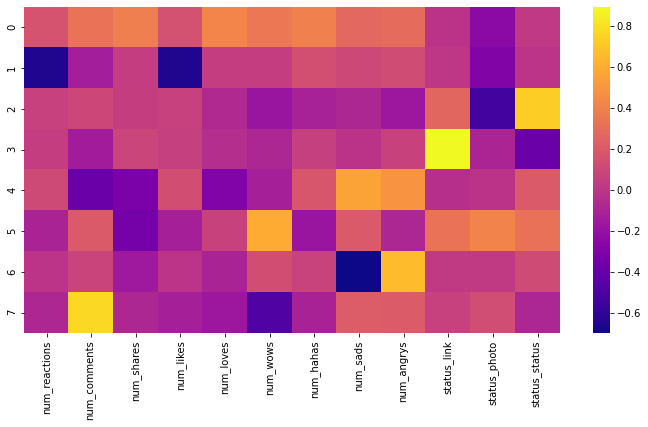

In [70]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [96]:
# Find out the eigenvector of the 5th component
eig_vecs[4] #fifth component

array([-0.42724823, -0.04953503, -0.00887642,  0.08022413, -0.08196663,
       -0.26788151,  0.09109709, -0.08135755, -0.1633935 ,  0.81935664,
       -0.13048085, -0.00507728])

In [97]:
# How much cumulative variance is explained by first four components?
tot = sum(eig_vals) # calculate the total value of eigen values
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] # looping to calculate variance explained %
cum_var_exp = np.cumsum(var_exp) # using numpy cumsum to create an array of cumsum of var_exp
cum_var_exp

array([ 30.6003517 ,  47.24532861,  57.52197176,  66.11806049,
        74.44738235,  80.3680237 ,  85.92710297,  90.7427283 ,
        94.20416078,  97.0598784 ,  99.62462354, 100.        ])

In [101]:
# What is explained variances for each of 4 components while performing PCA?
pca = PCA(n_components=4)
X_pca= pca.fit_transform(data_reduced)
pca.explained_variance_

array([3.65290009, 1.99890845, 1.23779299, 1.03108412])

In [103]:
# Which of the following is linear equation of third Principal component in terms of eigenvectors?
data_new.columns

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'status_link',
       'status_photo', 'status_status'],
      dtype='object')

In [106]:
pca.components_[2]

array([ 0.00000000e+00, -3.37116236e-15,  1.00000000e+00,  5.75412206e-15,
        2.18771237e-15, -2.18596167e-15, -1.05330327e-16,  9.48314772e-18])

In [112]:
print('The Linear eq of 3rd component: ')
for i in range(0,data_new.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[2][i],3),data_new.columns[i]),end=' + ')

The Linear eq of 3rd component: 
0.0 * num_reactions + -0.0 * num_comments + 1.0 * num_shares + 0.0 * num_likes + 0.0 * num_loves + -0.0 * num_wows + -0.0 * num_hahas + 0.0 * num_sads + 

IndexError: index 8 is out of bounds for axis 0 with size 8